# Marketing Analytics

### by Andrew Dietrick

“I’m a data analyst, and the Chief Marketing Officer has told me that previous marketing campaigns have not been as effective as they were expected to be. I need to analyze the data set to understand this problem and propose data-driven solutions.”

### Analysis Process

1. Assessing and Cleaning the data

2. Exploratory Data Analysis

3. Performing Statistical Analysis

4. Data Visualization and Further Analysis

5. Forming Data-Driven Solutions

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Suppress warnings

import warnings
warnings.simplefilter('ignore')

# Set up to view all the info of the columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Section 01: Assessing and Cleaning the Data

In [103]:
# Load the main dataset

df = pd.read_csv("/Users/ajdie/datasets/outside data/ml_project1_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [104]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Tennhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchase: Number of purchases made with a discount
- NumWebPurchase: Number of purchases made through the company's web site
- NumCatalogPurchase: Number of purchases made using a catalogue
- NumStorePurchase: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
- Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

In [105]:
# Info on dataset

def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())
    
basic_info(df)

This dataset has  29  columns and  2240  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   30

### Data Quality Issues

1. Income column has 23 missing values
2. Income's type is string
3. Dt_Customer's type is string
4. Additional Marital_Status values

#### Data Quality Issue 1 & 2
1. Income column has 23 missing values
2. Income's type is string

Divide the data into two dataframes: 
- one has income values
- one doesn't have income values

In [106]:
df_copy = df.copy()

In [107]:
df_copy['Income'] = df['Income'].fillna(0).astype(int)

In [108]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int32 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [109]:
df_copy.Income.sample(5)

952     44051
2076    27889
1839    57333
940     64831
1731    18690
Name: Income, dtype: int32

In [110]:
have_income = df_copy[df_copy.Income.isnull()==False]
no_income = df_copy[df_copy.Income.isnull()==True]

In [111]:
# Convert the one that has income to type int

have_income.Income = have_income.Income.astype(int)

# Replace missing values with the median value

no_income.Income = str(have_income.Income.median())

no_income.Income = no_income.Income.str.replace(".5", "")
no_income.Income = no_income.Income.astype(int)

In [112]:
# Merge the data
df_copy = no_income.append(have_income)

#### Confirm the Income column no longer has any missing values and that the values held are of type int

In [113]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int32 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

#### Data Quality Issue 3
3. Dt_Customer's type is string

Convert Dt_Customer type from object to datetime64

In [114]:
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

#### Confirm the Dt_Customer type changed from object to datetime64

In [115]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Data Quality Issue 4
4. Additional Marital_Status values

Replace certain status values

In [116]:
# Checking unique values of marital status column

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [117]:
# Replace 'Alone' with 'Single'
# Replace 'Together' as 'Married'

df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [118]:
# Drop rows with unknown/unusable marital status

df.drop(df[df['Marital_Status'] == 'Absurd'].index, inplace=True)
df.drop(df[df['Marital_Status'] == 'YOLO'].index, inplace=True)

In [119]:
# Check the unique values of 'Marital_Status' to confirm that the rows were dropped or replaced

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

### Store the cleaned data file

In [120]:
df_copy.reset_index(drop=True)
df_copy.to_csv('/Users/ajdie/datasets/outside data/clean_df.csv', index=False)

In [121]:
# load data
df = pd.read_csv("/Users/ajdie/datasets/outside data/clean_df.csv")

## Section 02: Exploratory Data Analysis
1. Are there any null values or outliers? How will you wrangle/handle them?
2. Are there any useful variables that you can engineer with the given data?
3. Do you notice any patterns or anomalies in the data? Can you plot them?

In [122]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Check for outliers

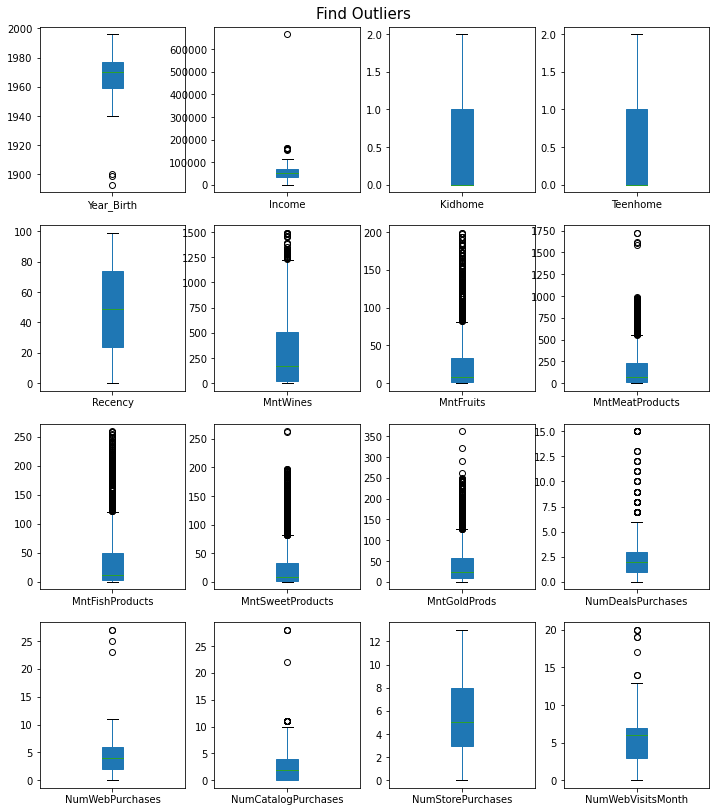

In [124]:
# Select the columns to plot by dropping the others

df_to_plot = df.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer',
                              'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                              'AcceptedCmp1','AcceptedCmp2', 'Complain', 
                              'Z_CostContact', 'Z_Revenue', 'Response']).select_dtypes(include=np.number)

# Subplots

df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

#### Section 02-1: Are there any null values or outliers? How will you wrangle/handle them?
Outliers mean they are below or above 3 standard deviations from the mean.
- Income had 23 null values; the median number was used to fill them in.
- Probable entry errors for Year_Birth since those are pre 1900 dates and those people are most likely not with us anymore
- Many columns have outliers, but most of them seem like natural outliers that came from the population.

In [125]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [126]:
# Remove outliers in year_birth

new_df = df[df.Year_Birth >= (df.Year_Birth.mean() - 3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

#### Section 02-2: Are there any useful variables that you can engineer with the given data?
* Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
* Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
* Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
* Minorhome: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
* Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
* Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
* Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column
* "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [127]:
new_df.Dt_Customer = pd.to_datetime(new_df.Dt_Customer)

#### Creation of the new features

In [128]:
new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase

In [129]:
new_df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
2132,11181,1949,PhD,Married,156924,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,2013,8,3,0,8,0,0,inf
53,2225,1977,Graduation,Divorced,82582,0,0,2014-06-07,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,3,11,1,2014,6,5,0,1617,22,3,73.500000
2202,11133,1973,PhD,YOLO,48432,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,2012,10,3,1,424,27,1,15.703704
1875,9612,1987,2n Cycle,Single,23830,0,0,2014-02-07,3,1,8,6,4,8,16,1,1,0,3,7,0,0,0,0,0,0,3,11,0,2014,2,4,0,43,12,0,3.583333
330,2861,1983,Graduation,Single,24072,1,0,2013-04-16,79,9,1,6,3,0,4,1,1,0,2,8,0,0,0,0,0,0,3,11,0,2013,4,1,1,23,12,0,1.916667
2056,7441,1973,Graduation,Divorced,71128,1,0,2012-10-06,80,958,159,447,20,0,31,3,2,10,12,7,0,0,0,0,0,0,3,11,0,2012,10,5,1,1615,34,0,47.500000
331,663,1989,PhD,Single,33996,0,0,2013-09-11,46,40,2,15,8,0,6,1,1,1,3,4,0,0,0,0,0,0,3,11,0,2013,9,2,0,71,10,0,7.100000
1879,3426,1975,Graduation,Divorced,70300,1,0,2013-07-15,89,1045,61,338,60,46,46,3,5,5,13,8,0,0,0,0,0,0,3,11,0,2013,7,0,1,1596,34,0,46.941176
1036,10613,1958,PhD,Together,37334,1,1,2014-02-26,44,26,1,16,2,2,15,4,3,0,4,4,0,0,0,0,0,0,3,11,0,2014,2,2,2,62,15,0,4.133333
682,75,1982,2n Cycle,Together,41039,0,0,2013-07-25,32,34,11,137,179,61,45,1,8,1,5,8,0,0,0,0,0,0,3,11,0,2013,7,3,0,467,23,0,20.304348


#### Section 02-3: Do you notice any patterns or anomalies in the data? Can you plot them?
* To identify patterns, we will first identify feature correlations. Positive correlations between features appear blue, negative correlations appear red, and no correlation appears grey in the clustered heatmap below.
* From this heatmap we can observe the following clusters of correlated features:
    * The **"High Income"** cluster:
        * Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
        * Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'
    * The **"Have Kids & Teens"** cluster:
        * Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids vs. teens)
        * Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
    * The **"Advertising Campaigns"** cluster:
        * Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
        * Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster
* Anomalies:
    * Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
    * Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website

#### Correlation Heatmap

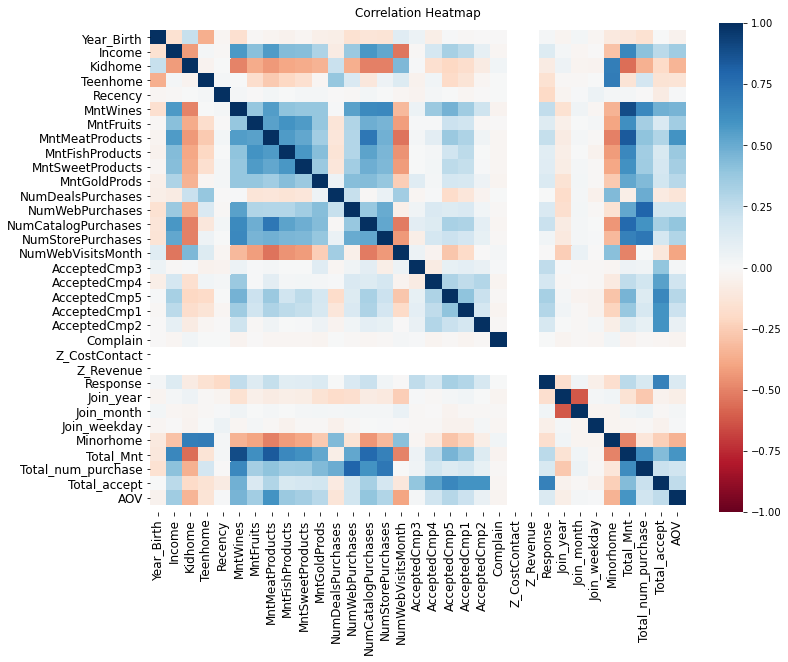

In [130]:
# Select columns to plot

df_to_plot = new_df.drop(columns=['ID'])

# Create heatmap

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

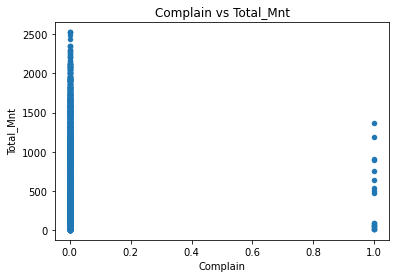

In [131]:
# Visualize Complain vs Total_Mnt

new_df.plot(x='Complain', y='Total_Mnt', kind='scatter')
plt.title("Complain vs Total_Mnt");

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [133]:
new_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Join_year              0
Join_month             0
Join_weekday           0
Minorhome              0
Total_Mnt              0
Total_num_purchase     0
Total_accept           0
AOV                    0
dtype: int64

In [134]:
new_df['Income'] = new_df['Income'].fillna(0)

In [135]:
new_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Join_year              0
Join_month             0
Join_weekday           0
Minorhome              0
Total_Mnt              0
Total_num_purchase     0
Total_accept           0
AOV                    0
dtype: int64

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   int64         
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [142]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.03373965091266398
Pearson p-value:  0.11063526070950919


In [143]:
new_df[new_df.Complain > 0].ID.nunique()

20

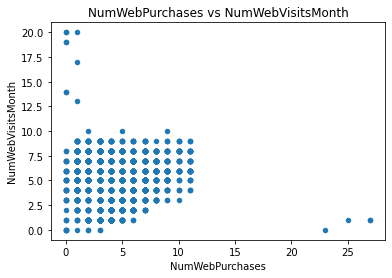

In [144]:
# Visualize NumWebPurchases vs NumWebVisitsMonth

new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

#### Scatter plot of NumWebPurchases vs NumWebVisitsMonth doesn't show any correlation

## Section 03: Statistical Analysis

Statistical tests in the form of regressions will be run to answer these questions & propose data-driven action recommendations.

* What factors are significantly related to the number of store purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

#### Section 03-1: What factors are significantly related to the number of store purchases?

#### The top 7 factors are:

1. Total amount spent in the last two years
2. Average order volume
3. Total number of purchases in the last two years
4. Amount spent on wine in the last 2 years
5. Number of purchases made using a catalog
6. Number of visits to company's web site in the last month
7. Total number of purchases through website in the last two years 

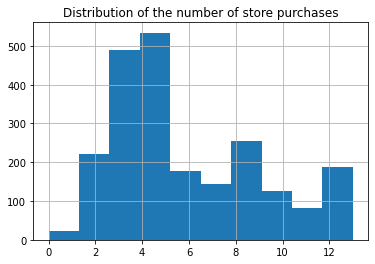

In [189]:
new_df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

In [146]:
# Drop ID as everyone has unique ID

rd_df = new_df.drop(columns=['ID', 'Dt_Customer'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding

rd_df = pd.get_dummies(rd_df)

# Import train_test_split function

from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['NumStorePurchases'])  # Features
y=rd_df['NumStorePurchases']  # Labels

# Split dataset into training set (70%) and test set (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Import Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Classifier with 100 trees

rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

# Train the model using the training sets y_pred=clf.predict(X_test)

rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7677678571428572
Mean Squared Error: 1.2905771577380951
Root Mean Squared Error: 1.1360357202738367


#### Findings:

* The range of NumStorePurchases is 13
* RMSE: 1.1 (less than 10% of the range) which means it is a relaible model

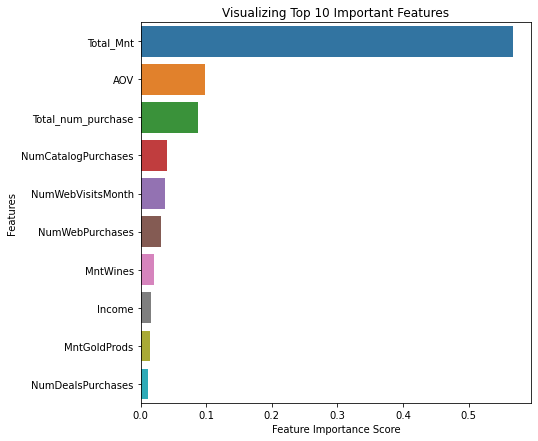

In [152]:
# Find feature importance scores

import pandas as pd
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot

plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])

# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

 99%|===================| 666/672 [00:18<00:00]        

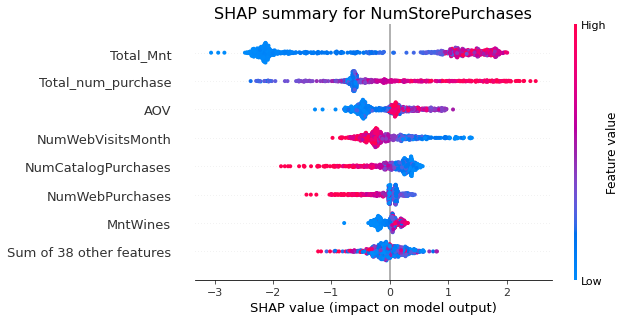

<Figure size 432x288 with 0 Axes>

In [188]:
import shap

# Calculate SHAP values

ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

# Plot

plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()

#### Findings:

1. The number of store purchase increases with a higher total amount spent, higher total purchase amount, higher AOV, and higher amount of wines purchased.
2. The number of store purchase decreases with a higher number of website visits, higher number of purchases through catalog, and higher number of purchases through websites.

Summary: People who mostly shop at the store, tend to buy more wines, have higher average order volume, and shop less through internet/catalog.

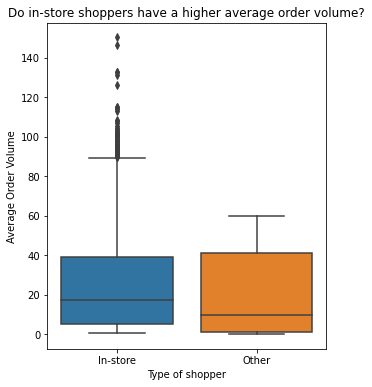

In [156]:
store_shoppers = new_df[new_df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = new_df[new_df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

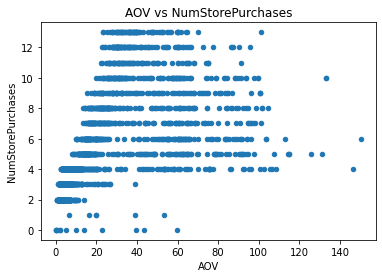

In [157]:
# AOV vs NumStorePurchases

all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [158]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5505389394031128
Pearson p-value:  2.0526348645442993e-177


#### Section 03-2: People who spent an above average amount on gold in the last 2 years would have more in store purchases?

Yes, they are statistically significant and have positive correlation

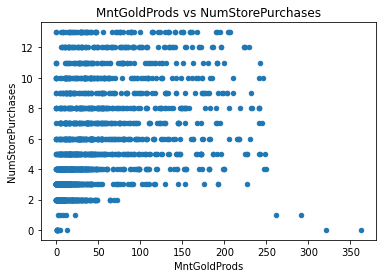

In [160]:
# Visualize MntGoldProds vs NumStorePurchases

new_df.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [163]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['MntGoldProds'], y=all_shoppers['NumStorePurchases'])

#Print results

print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.38318745816731203
Pearson p-value:  4.055657642633392e-79


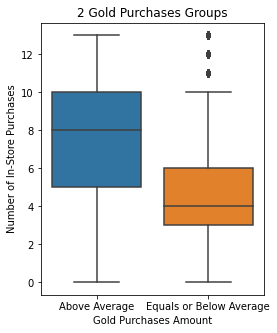

In [164]:
gold_above_avg =  new_df[new_df.MntGoldProds > new_df.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  new_df[new_df.MntGoldProds <= new_df.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sns.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

#### Section 03-3: Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

Married PhD spends less on fish products than the rest

In [165]:
#Divide the data into two groups: married PhD and the rest

new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Join_year', 'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

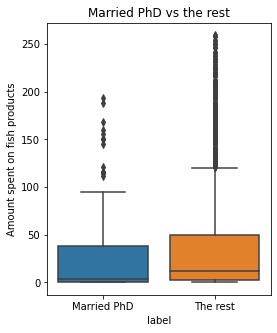

In [167]:
married_phd = new_df[(new_df.Education == "PhD") & (new_df.Marital_Status == "Married")]
married_phd['label'] = "Married PhD"
the_rest = new_df[(new_df.Education != "PhD") | (new_df.Marital_Status != "Married")]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the rest")
sns.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products");
plt.savefig('Married PhD vs the rest.png', bbox_inches='tight')

In [168]:
#Use t-test to test these two groups have the same mean

from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.

pval = ttest_ind(married_phd.MntFishProducts, the_rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005297012242158541


Note: Since p-value is less than 0.05, I concluded that we reject the null hypothesis, meaning that their means are not only different, but the Married Phd's mean is lower than the rest as we can see from the graph.

## Section 04: Data Visualization

1. Which marketing campaign is most successful?
2. What does the average customer look like for this company? 
3. Which products are performing best?
4. Which channels are underperforming?

#### Section 04-1: Which marketing campaign is most successful?

The last marketing campaign is most successful

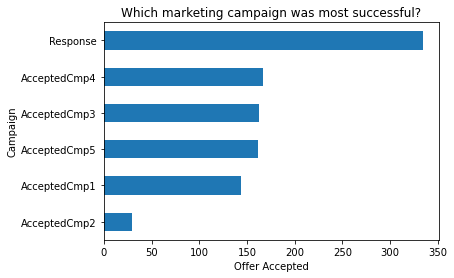

In [170]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign was most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign was most successful.png', bbox_inches='tight')

#### Section 04-2: What does the average customer look like for this company?

An average customer...

* has an annual income of 51700 dollars
* had purchased 49 days ago
* has spent a total of 606 dollars
* has purchased 20 times
* has an AOV of 26.8 dollars
* became a customer in mid-June
* became a customer on Thursday
* spent most on wines(304 dollars) and then meat products(167 dollars)
* spent least on fruit(26 dollars) and sweet products(27 dollars)

In [173]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

new_df.mean()

ID                      5590.726419
Year_Birth              1968.901654
Income                 51676.153330
Kidhome                    0.444345
Teenhome                   0.506482
Recency                   49.104604
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
MntGoldProds              43.968708
NumDealsPurchases          2.326777
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
NumWebVisitsMonth          5.319177
AcceptedCmp3               0.072865
AcceptedCmp4               0.074654
AcceptedCmp5               0.072418
AcceptedCmp1               0.064372
AcceptedCmp2               0.013411
Complain                   0.008941
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.149307
Join_year               2013.027716
Join_month                 6

#### Section 04-3: Which products are performing best?

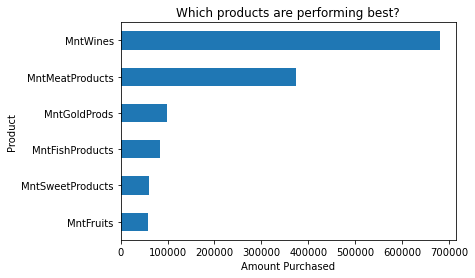

In [175]:
new_df[["MntWines", "MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().sort_values().plot.barh()
plt.title("Which products are performing best?")
plt.xlabel("Amount Purchased");
plt.ylabel("Product")
plt.savefig('Which products are performing best.png', bbox_inches='tight')

#### Section 04-3: Which channels are underperforming?

Catalog is the most underperforming channel

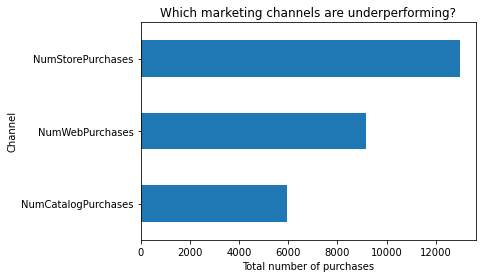

In [187]:
new_df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel");

## Further Investigation:

Now that we know the last campaign is the most successful one, we can further investigate the differences in the customer characteristics and purchase behaviors(listed below) between the most successful campaigns: The last one & Campaigns 1-5

* Characteristics: 'Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday'
* Purchase behaviors:
    * Products: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    * Channel: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    * Total: 'Total_Mnt', 'Total_num_purchase', 'AOV'

Create 2 groups that accepted the offers from the last campaign and the campaign 1-5

In [177]:
cp_last = new_df[new_df.Response > 0]
cp__the_rest = new_df[new_df.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(334, 2207)

Remove the overlapping customers who accepted offers from both cp_last and cp__the_rest so that twe can see the clear differences between these two groups

In [179]:
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.ID):
    if i in list(cp_last.ID):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.ID != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(334, 1893)

In [181]:
cp_last = cp_last[['Year_Birth', 'Income', 'Minorhome', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
cp__the_rest2 = cp__the_rest2[['Year_Birth', 'Income', 'Minorhome', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]

In [191]:
cp_last.mean()

Year_Birth              1969.416168
Income                 60029.407186
Minorhome                  0.646707
Join_month                 6.739521
Join_weekday               2.700599
MntWines                 502.703593
MntFruits                 38.203593
MntMeatProducts          294.353293
MntFishProducts           52.050898
MntSweetProducts          38.634731
NumWebPurchases            5.071856
NumCatalogPurchases        4.203593
NumStorePurchases          6.095808
Total_Mnt                987.392216
Total_num_purchase        23.000000
AOV                       41.829197
dtype: float64

In [192]:
cp__the_rest2.mean()

Year_Birth              1968.807184
Income                 50129.525092
Minorhome                  1.005283
Join_month                 6.409403
Join_weekday               3.032752
MntWines                 265.836767
MntFruits                 24.267829
MntMeatProducts          144.358690
MntFishProducts           34.996302
MntSweetProducts          25.112520
NumWebPurchases            3.918119
NumCatalogPurchases        2.384046
NumStorePurchases          5.728473
Total_Mnt                535.491812
Total_num_purchase        19.681986
AOV                       24.083059
dtype: float64

#### Visualize the Differences

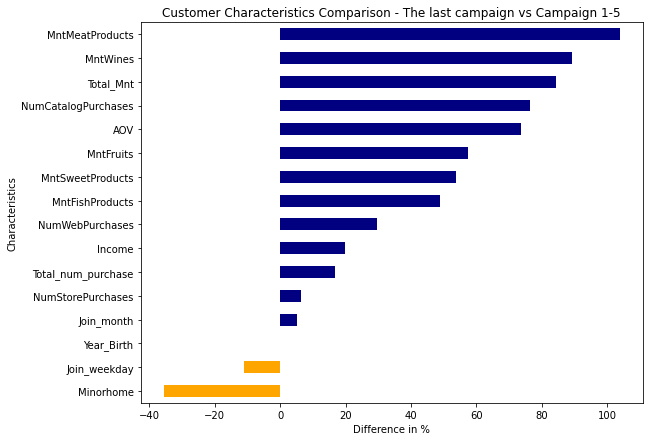

In [194]:
plt.figure(figsize = (9, 7))
value = pd.DataFrame((((cp_last.mean()) - cp__the_rest2.mean()) / cp__the_rest2.mean())*100)
value.dropna(inplace = True)
value.sort_values(by=0,inplace = True)
value['positive'] = value[0] >=0
value[0].plot(kind='barh', color=value.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")
plt.savefig('Customer Characteristics Comparison - The last campaign vs Campaign 1-5', bbox_inches='tight');

In [196]:
new_df2 = new_df[['Year_Birth', 'Income', 'Minorhome', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]

In [197]:
new_df2.mean()

Year_Birth              1968.901654
Income                 51676.153330
Minorhome                  0.950827
Join_month                 6.465802
Join_weekday               2.988824
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
Total_Mnt                605.743406
Total_num_purchase        20.189987
AOV                       26.842831
dtype: float64

#### Visualize the Differences

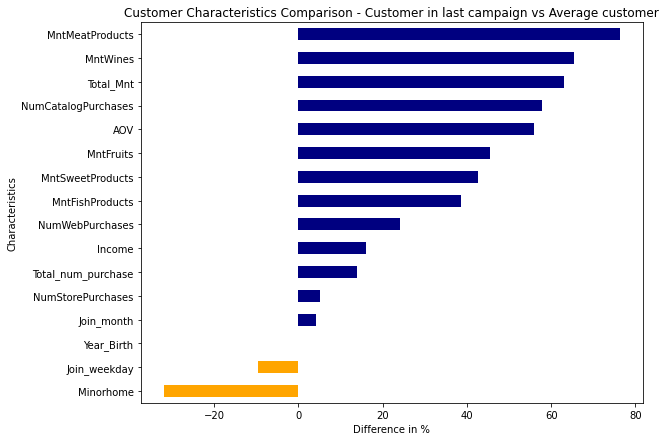

In [195]:
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last.mean()) - new_df2.mean()) / new_df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics");

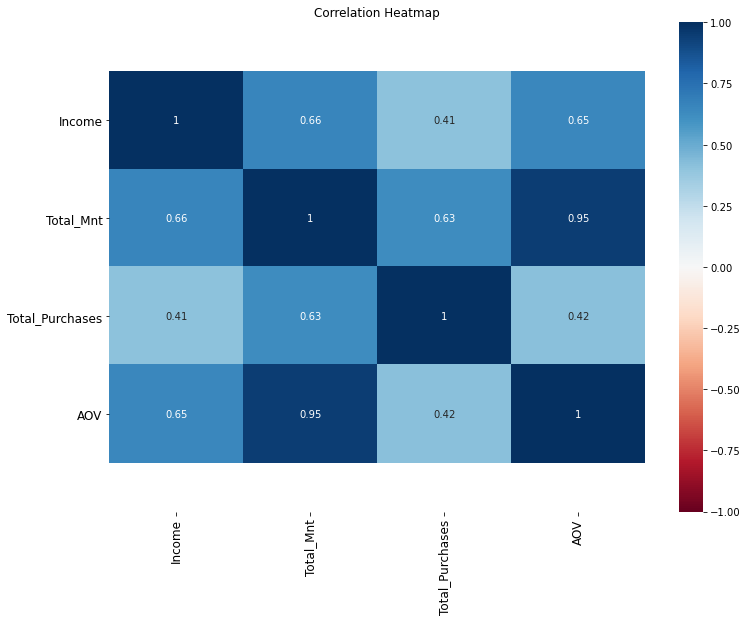

In [199]:
#Select columns to plot

new_df2 = new_df[new_df.AOV <= (new_df.AOV.mean()+3*new_df.AOV.std())]
new_df2.replace([np.inf, -np.inf], 0, inplace=True)
new_df2 = new_df2[new_df2.Total_num_purchase <= (new_df2.Total_num_purchase.mean()+3*new_df2.Total_num_purchase.std())]
new_df2 = new_df2[new_df2.Total_Mnt <= (new_df2.Total_Mnt.mean()+3*new_df2.Total_Mnt.std())]

df_to_plot = new_df2[['Income', 'Total_Mnt','Total_num_purchase', 'AOV']]
df_to_plot.rename(columns={'Total_num_purchase':'Total_Purchases'}, inplace=True)

#Create heatmap

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  annot = True,cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap2.png', bbox_inches='tight')
plt.show()

In [200]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Join_year', 'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [201]:
#Drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

#One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['Total_accept'])  # Features
y=rd_df['Total_accept']  # Labels

# Split dataset into training set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.44477313633786847
Mean Squared Error: 0.612359090124851
Root Mean Squared Error: 0.7825337629296585


In [202]:
from scipy.stats import pearsonr

list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df[i], y=new_df['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  0.4787761368904706
Pearson p-value:  1.538453690271273e-128
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.30103342502969976
Pearson p-value:  4.4065093290159594e-48
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.190680066585235
Pearson p-value:  9.275051767778576e-20
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.15914618281257267
Pearson p-value:  3.697344094817059e-14
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.14976326660144543
Pearson p-value:  1.082631664111806e-12
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  0.178089851831021
Pearson p-value:  2.1328375413163002e-17
 


#### Find feature importance scores

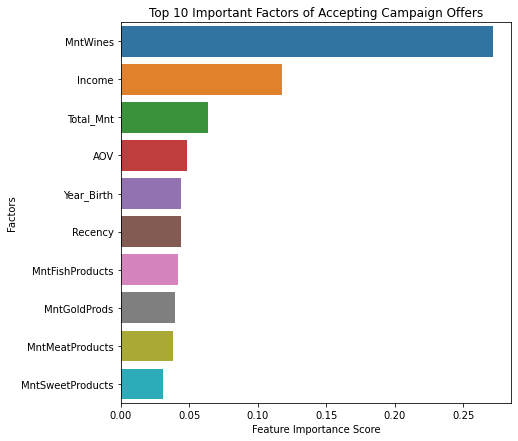

In [204]:
import pandas as pd
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

## Section 05: CMO Recommendations

### Summaries

* The last campaign
    * Performed twice as good as the previous campaigns
    * Attracted more valuable customers in terms of AOV, total amount spent, and the total number of purchases, compared to the customers who were attracted by the previous campaigns
    * Customers spent nearly two times more money on meat products and wines compared to the customers in the previous campaigns
    * Customers purchased more evenly through stores, websites, and catalogs, whereas the customers in the previous campaigns mostly purchased through stores and websites.


* Most customers purchased through physical stores, where they tended to spend more per purchase. The reason might be that the customers had more impulsive purchases when they saw other similar products in stores.


* People having kids at home are less valuable customers as they...
    * tend to purchase less
    * tend to have a higher number of purchases made with a discount
    
    
* The average customer...
    * became a customer on Thursday
    * became a customer in Mid-June


### Actionable Data-Driven Solutions


#### On Acquisition:


1. Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines



2. Try to have a brand discount day on Thursday or a brand discount month in June to attract new customers


#### On Increasing revenue:


1. Have marketing campaigns to convert customers who shop mostly on a website or catalog to in-store purchasers as most in-store purchases have high average order volume


2. Build a loyalty program to make high-income customers loyal as long as possible